In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd

In [3]:
x1=np.array([0,0,1,1])
x2=np.array([0,1,0,1])
y=np.array([0,0,0,1])
df_or=pd.DataFrame({'X1':x1,'X2':x2,'y':y})
df_or

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [4]:
X=np.asarray(df_or.iloc[:,0:2]) 
y=np.asarray(df_or.iloc[:,2])

In [5]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X[i]
    return suma

In [8]:
def escalon(x):
    if x>=0:
        a=1
    else:
        a=0
    return a  

In [159]:
def regularizado(w,x,y,lam,eta):
    #res=np.array([])

    for i in range(len(x)):

        sal = salida(w[0],w[1:len(w)],x[i])
        #Calculo el error de prediccion        
        error =y[i] - escalon(sal)
        # Obtengo el error w0
        w[0] = w[0] + eta*error
        
    
        for j in range(len(x.T)):
            w[j+1] = w[j+1] + eta*error*x[i,j]- lam*w[j+1]
        #print(escalon(sal),y[i])
        #res=np.append(res,escalon(salida(w[0],w[1:len(w)],x[i])))
        
    res=[escalon(salida(w[0],w[1:len(w)],x[i])) for i in range(len(x))]    
    return w,res

In [153]:
def xand(w0,x,y,lam,eta):
    w,res=regularizado(w0,x,y,lam,eta)
    dif=np.sum(y!=res) 
    cont=0
    while(dif!=0 and cont<20):
        w,res=regularizado(w,x,y,lam,eta)
        dif=np.sum(y!=res)
        cont+=1
    return(w)    

In [43]:
w0=[rnd.random() for i in range(X.shape[1]+1)]
ww=xand(w0,X,y,.001,.1)
ww

[-0.45500095890158943, 0.30708626687407337, 0.34621588381011381]

In [33]:

w0=[rnd.random() for i in range(X.shape[1]+1)]
ww,res=regularizado(w0,X,y,.001,.1)
ww
dif=np.sum(y!=res)
cont=0
while(dif!=0):
    ww,res=regularizado(ww,X,y,.001,.1)
    dif=np.sum(y!=res)
    cont+=1
print(cont)
ww

6


[-0.45554106416768647, 0.26506104552536169, 0.22064271850985426]

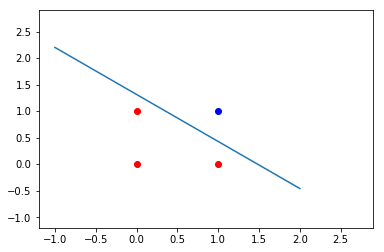

In [44]:
plt.scatter(df_or[df_or['y']==1]['X1'],df_or[df_or['y']==1]['X2'],color='blue') 
plt.scatter(df_or[df_or['y']==0]['X1'],df_or[df_or['y']==0]['X2'],color='red')
plt.xlim(-1.2,2.9)
plt.ylim(-1.2,2.9)
x=np.linspace(-1,2,10)
plt.plot(x,-(ww[0]/ww[2])-(ww[1]/ww[2])*x)

**variacion sin regularizacion**

In [90]:
parms=[]
for i in range(10):
    w0=[rnd.random() for i in range(X.shape[1]+1)]
    ww=xand(w0,X,y,.00001,.1)
    parms.append(ww)
    
parms

[[-0.55752476370077475, 0.46873916211450839, 0.41400287454511553],
 [-0.55749423036951207, 0.39132279777764778, 0.17043416939168496],
 [-0.35291664584667137, 0.29436723708028395, 0.1541420067571648],
 [-0.30379232613702162, 0.1685377253727833, 0.18697786267748004],
 [-0.41179155857700589, 0.22214757789554193, 0.23878546905071849],
 [-0.58684108034842952, 0.42201956557979092, 0.21987972519354046],
 [-0.34858063293280567, 0.26930246937899138, 0.17334721904099251],
 [-0.26452258536401846, 0.17166413519634238, 0.10167220591782838],
 [-0.6283104541008715, 0.35367068973369165, 0.47156148104205331],
 [-0.38332396303654992, 0.29439388753330786, 0.23829224566708426]]

In [91]:
parms[0]

[-0.55752476370077475, 0.46873916211450839, 0.41400287454511553]

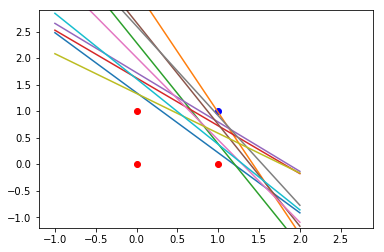

In [92]:
plt.scatter(df_or[df_or['y']==1]['X1'],df_or[df_or['y']==1]['X2'],color='blue') 
plt.scatter(df_or[df_or['y']==0]['X1'],df_or[df_or['y']==0]['X2'],color='red')
plt.xlim(-1.2,2.9)
plt.ylim(-1.2,2.9)
x=np.linspace(-1,2,10)
for i in range(len(parms)):
    plt.plot(x,-(parms[i][0]/parms[i][2])-(parms[i][1]/parms[i][2])*x)
    

**variacion CON regularizacion**

In [142]:
parms=[]
for i in range(10):
    w0=[rnd.random() for i in range(X.shape[1]+1)]
    ww=xand(w0,X,y,.001,.25)
    parms.append(ww)
    
parms

[[-0.59575839414347898, 0.48194383518366879, 0.26574829931869665],
 [-0.47626924523201219, 0.2291522452204249, 0.31979513336609672],
 [-0.78463237108765205, 0.62386374660179533, 0.29412899709576729],
 [-0.63714248419057717, 0.49510927459159482, 0.51692249607490037],
 [-0.71000718277933372, 0.46404511882143151, 0.44184418341231041],
 [-0.51688697399093053, 0.28648565700351208, 0.27747500102351164],
 [-0.39016049061842561, 0.2973973857401272, 0.35676065126900208],
 [-0.65231100630451233, 0.55537326920935393, 0.21483984166642162],
 [-0.64097285107154678, 0.51010724952236353, 0.26787538145232076],
 [-0.85030569046553561, 0.61539385056507867, 0.42989338019327045]]

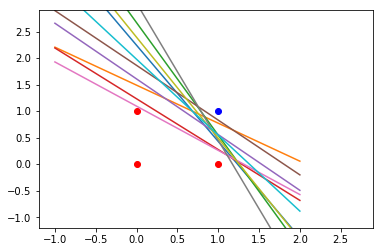

In [143]:
plt.scatter(df_or[df_or['y']==1]['X1'],df_or[df_or['y']==1]['X2'],color='blue') 
plt.scatter(df_or[df_or['y']==0]['X1'],df_or[df_or['y']==0]['X2'],color='red')
plt.xlim(-1.2,2.9)
plt.ylim(-1.2,2.9)
x=np.linspace(-1,2,10)
for i in range(len(parms)):
    plt.plot(x,-(parms[i][0]/parms[i][2])-(parms[i][1]/parms[i][2])*x)

**XOR**

In [148]:
df_Xor=pd.DataFrame({'X1':[0,0,1,1],'X2':[0,1,0,1],'y':[0,1,1,0]})
df_Xor

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [201]:
X=np.asarray(df_Xor.iloc[:,0:2]) 
y=np.asarray(df_Xor.iloc[:,2])

In [202]:
w0=[rnd.random() for i in range(X.shape[1]+1)]
ww=xand(w0,X,y,.001,.1)
wwimport pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd

[0.14279439253968812, -0.17913109985659084, -0.20942886521800877]

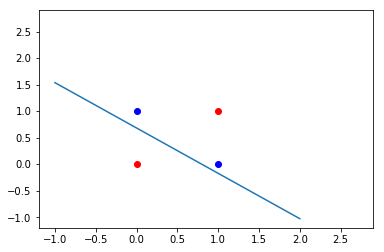

In [203]:
plt.scatter(df_Xor[df_Xor['y']==1]['X1'],df_Xor[df_Xor['y']==1]['X2'],color='blue') 
plt.scatter(df_Xor[df_Xor['y']==0]['X1'],df_Xor[df_Xor['y']==0]['X2'],color='red')
plt.xlim(-1.2,2.9)
plt.ylim(-1.2,2.9)
x=np.linspace(-1,2,10)
plt.plot(x,-(ww[0]/ww[2])-(ww[1]/ww[2])*x)

In [204]:
print([escalon(salida(ww[0],ww[1:len(ww)],X[i])) for i in range(len(X))],y) 

[1, 0, 0, 0] [0 1 1 0]


**variacion sin regularizacion XOR**

In [157]:
parms=[]
for i in range(10):
    w0=[rnd.random() for i in range(X.shape[1]+1)]
    ww=xand(w0,X,y,.001,.1)
    parms.append(ww)
    
parms

[[0.054674543367535355, -0.12353023147501252, -0.037070388717301034],
 [0.039424334772783565, -0.11418346692334877, -0.0083703987230987209],
 [0.077048258685135262, -0.1667278221322285, -0.055882119274319186],
 [0.01839416528996371, -0.04598405133189401, 0.020874668864652751],
 [0.095010134016399517, -0.27028736826002042, -0.028782025441068088],
 [0.083130029354231166, -0.15674873238611467, -0.015534977881850959],
 [0.046646156133246935, -0.1253815590051866, 0.032876151449256291],
 [0.007931440191880107, -0.067835227651159791, -0.15494059793785295],
 [0.014604703469757091, -0.031636515566949103, 0.03546849042677061],
 [0.070446128966190236, -0.075153970966358674, -0.064840592582169343]]

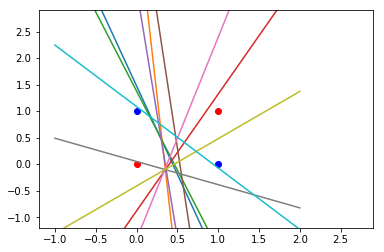

In [158]:
plt.scatter(df_Xor[df_Xor['y']==1]['X1'],df_Xor[df_Xor['y']==1]['X2'],color='blue') 
plt.scatter(df_Xor[df_Xor['y']==0]['X1'],df_Xor[df_Xor['y']==0]['X2'],color='red')
plt.xlim(-1.2,2.9)
plt.ylim(-1.2,2.9)
x=np.linspace(-1,2,10)
for i in range(len(parms)):
    plt.plot(x,-(parms[i][0]/parms[i][2])-(parms[i][1]/parms[i][2])*x)

**variacion CON regularizacion**

In [192]:
parms=[]
for i in range(10000):
    w0=[rnd.random() for i in range(X.shape[1]+1)]
    ww=xand(w0,X,y,.15,.1)
    parms.append(ww)
    
parms

[[0.073344367968982443, -0.092370501179910205, -0.058055082767181895],
 [0.0027592201478423284, -0.031381369786699462, -0.058055215025471688],
 [-0.016628303371047121, -0.1482175313983774, -0.058055260679790478],
 [0.033095452991910107, -0.04444144965271149, -0.058054797361828586],
 [0.0043854290213866387, -0.031382062125591595, -0.058055661923742306],
 [0.0025155695493862817, -0.031381534018838406, -0.058055227750072172],
 [-0.031880294563338379, -0.14821681837784437, -0.058056137453572174],
 [0.042323584895203853, -0.083109562927027786, -0.058055089891915032],
 [0.040645063346278404, -0.079310549150743828, -0.058055042160399223],
 [0.065153171160123036, -0.090182988236609099, -0.05805457187818347],
 [0.024110543329279366, -0.034710937192307167, -0.058055025811545632],
 [0.016590299964621719, -0.031381229711668186, -0.058054822121123846],
 [0.0058859772193197157, -0.031382083172027876, -0.058054814956940946],
 [0.060597644859871902, -0.089884818488883286, -0.058056651184949425],
 [-0.

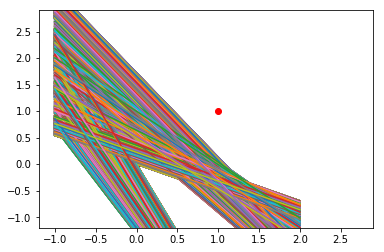

In [193]:
plt.scatter(df_Xor[df_Xor['y']==1]['X1'],df_Xor[df_Xor['y']==1]['X2'],color='blue') 
plt.scatter(df_Xor[df_Xor['y']==0]['X1'],df_Xor[df_Xor['y']==0]['X2'],color='red')
plt.xlim(-1.2,2.9)
plt.ylim(-1.2,2.9)
x=np.linspace(-1,2,10)
for i in range(len(parms)):
    plt.plot(x,-(parms[i][0]/parms[i][2])-(parms[i][1]/parms[i][2])*x)